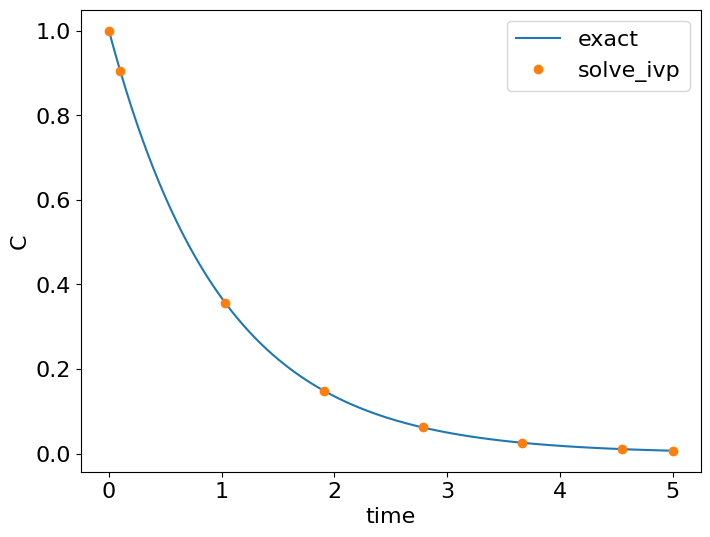

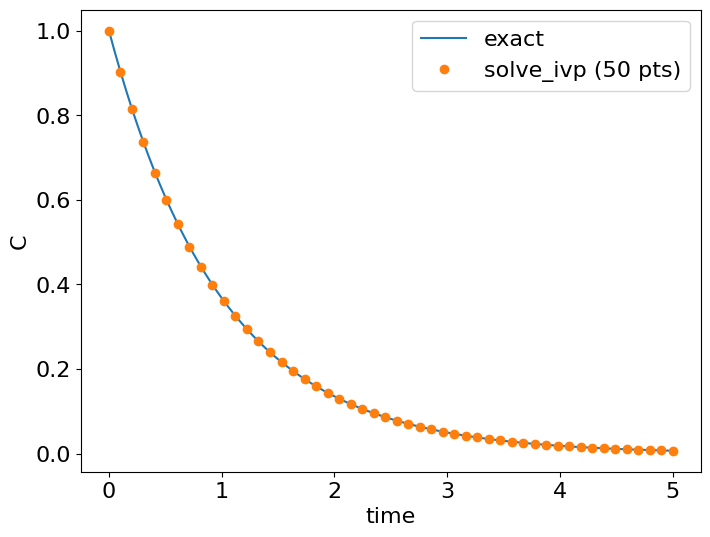

<function matplotlib.pyplot.show(close=None, block=None)>

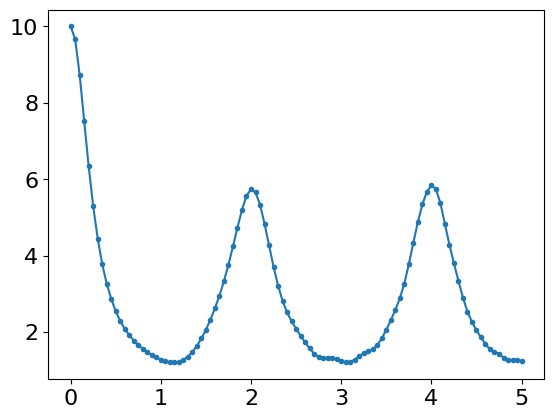

In [4]:
# Solve:
#   
#   dC/dt = -C/tau
# 
# with tau=1, C(0)=1, and t_end=5.

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# define the function
def fA(t, C):
    tau = 1.0
    return -C/tau

# (3) create array of initial and final times
t_span = np.array([0, 5])

# (4) set initial condition
C0 = np.array([1.0])

# (5) solve the problem
soln = solve_ivp(fA, t_span, C0)
t = soln.t
C = soln.y[0] # returns an array!

# The exact solution for comparison
t_exact = np.linspace(t_span[0], t_span[1], 101)
C_exact = C0*np.exp(-t_exact/1.0)

# plot the answer
plt.rc("font", size=16)
plt.figure(figsize=(8,6))
plt.plot(t_exact, C_exact, '-', label='exact')
plt.plot(t, C, 'o', label='solve_ivp')
plt.xlabel('time')
plt.ylabel('C');
plt.legend()
plt.show()


#-----------------------------------------------------------
# B. odeint with explicit time points
#-----------------------------------------------------------
#
# Solve the previous example with 50 internal time-points
#
#   - To do so, we need to add an extra argument: "t_eval = <array of times>"
#     to the solve_ivp call.
#

# (2) define the function, let tau be an extra parameter
def fB(t, C):
    tau = 1
    return -C/tau

# (3) same array of times 
t_span = np.array([0, 5])
times = np.linspace(t_span[0], t_span[1], 50) # here is where I define 50

# (4) same initial condition
C0 = np.array([1.0])

# (5) solve the problem
soln = solve_ivp(fB, t_span, C0, t_eval = times)
t = soln.t
C = soln.y[0]

# The exact solution for comparison
t_exact = np.linspace(t_span[0], t_span[1], 101)
C_exact = C0*np.exp(-t_exact/1.0)

# plot the answer
plt.rc("font", size=16)
plt.figure(figsize=(8,6))
plt.plot(t_exact, C_exact, '-', label='exact')
plt.plot(t, C, 'o', label='solve_ivp (50 pts)')
plt.xlabel('time')
plt.ylabel('C');
plt.legend()
plt.show()

#-----------------------------------------------------------
# Solve the first order IVP:
#
#   dy/dt = cos(pi*t**2) - y**2 * sin(pi*t), y(0) = 10
# 
# in the range t = [0, 5] and plot the solution as a function of t.


def rhs(t, y):
    return np.cos(np.pi*t**2) - y**2*np.sin(np.pi*t)

t_span = np.array([0, 5])
y0 = np.array([10])

soln = solve_ivp(rhs, t_span, y0,
                 t_eval=np.linspace(t_span[0], t_span[1], 101)) # this line isn't necessary, but it makes the plot look smoother
t = soln.t
y = soln.y[0]

plt.plot(t, y, '.-')
plt.show
